In [1]:
using Plots, LaTeXStrings

In [2]:
"""
    ciclosestables!(xx, f, nit, nout, cc)

Esta función itera el mapeo `f`, de una variable, `nit+nout` veces, 
usando como condición inicial `x0=0`; los últimos `nout` iterados 
actualizan al vector `xx` que tiene longitud `nout`. `cc` es el valor
del parámetro del mapeo `f`. El mapeo `f` debe ser definido de 
tal manera que `f(x0,cc)` tenga sentido. La idea es los últimos 
`nout` iterados reflejen los ciclos estables del mapeo `f`. 
"""
function ciclosestables!(xx, f, nit, nout, cc,x0)
    @assert nit > 0 && nout > 0
    
    # Primeros nit iterados
   
    for it = 1:nit
        x0 = f(x0, cc)
    end
    
    # Se guardan los siguientes nout iterados
    for it = 1:nout
        x0 = f(x0, cc)
        @inbounds xx[it] = x0
    end
    
    nothing
end

ciclosestables!

In [3]:
"""
    diagbifurc(f, nit, nout, crange)

Itera el mapeo `f` `nit+nout` veces y regresa una matriz
cuya columna `i` tiene los últimos `nout` iterados del mapeo
para el valor del parámetro del mapeo `crange[i]`.

La función `f` debe ser definida de tal manera que `f(x0, c)` 
tenga sentido.
"""
function diagbifurc(f, nit, nout, crange,x0)
    xx = Vector{Float64}(nout)
    ff = Array{Float64,2}(nout, length(crange))
    
    for ic in eachindex(crange)
        c = crange[ic]
        ciclosestables!(xx, f, nit, nout, c,x0)
        ff[:,ic] = xx
    end
    
    return ff
end

diagbifurc

In [12]:
Qc(x,c) = x^2 + c

crange = 0.25:-1/2^10:-2.0

ff = diagbifurc(Qc, 1000, 256, crange,0.0); 
cc = ones(size(ff)[1])*crange';

# Esto cambia las matrices en vectores; ayuda un poco para los dibujos
ff = reshape(ff, size(ff)[1]*size(ff)[2]);
cc = reshape(cc, size(ff));


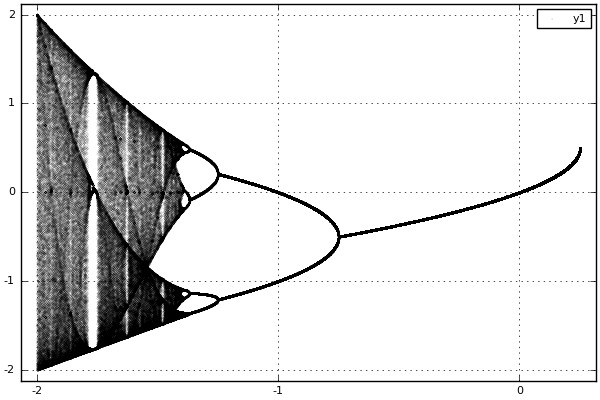

In [13]:
scatter(cc, ff, markersize= 0.05)


In [14]:
Ict(x,m, r,s) = r*x^2/((r-1)*x^2/m + 1 + s)
Ict1(x,s) = Ict(x,100,10,s)

crange = 0:1/2:1000

ff = diagbifurc(Ict1, 1000, 256, crange,1000); 
cc = ones(size(ff)[1])*crange';

# Esto cambia las matrices en vectores; ayuda un poco para los dibujos
ff = reshape(ff, size(ff)[1]*size(ff)[2]);
cc = reshape(cc, size(ff));


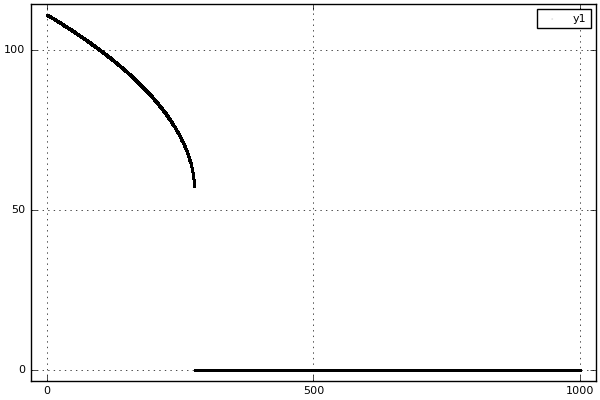

In [15]:
scatter(cc, ff, markersize= 0.05)


In [8]:
function track(F,n,x0)
    t = Float64[x0]
    x = x0
    for i in 1:n
        x = F(x)
        push!(t,x)
    end
    t

end

track (generic function with 1 method)

In [9]:
tt= track(x->Ict(x,2,2,0),1000,100)

1001-element Array{Float64,1}:
 100.0    
   3.9992 
   3.5554 
   3.45358
   3.42559
   3.41753
   3.41518
   3.4145 
   3.4143 
   3.41424
   3.41422
   3.41422
   3.41421
   ⋮      
   3.41421
   3.41421
   3.41421
   3.41421
   3.41421
   3.41421
   3.41421
   3.41421
   3.41421
   3.41421
   3.41421
   3.41421


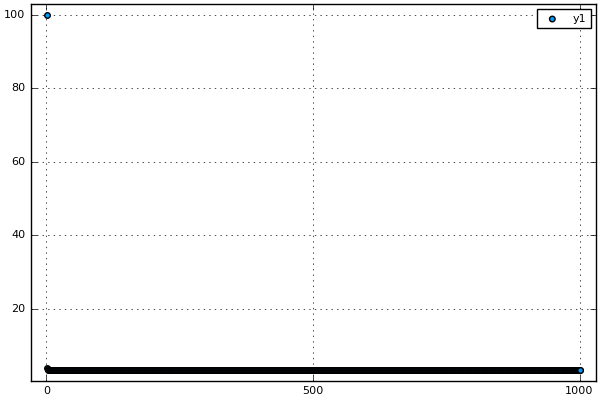

In [10]:
scatter(tt)


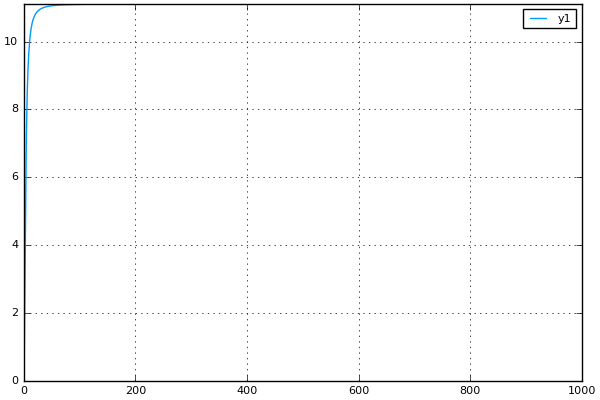

In [11]:
plot(x->Ict(x,10,10,10),crange)